<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.826795,54.489650,42.860757,191.092420,370.269622,162.012510,208.257112
1,0.0,1.0,64.657446,78.817766,50.307862,-225.925297,-22.142224,214.921461,-237.063684
2,0.0,2.0,60.114217,55.557975,23.047448,46.590213,195.309853,138.293578,57.016275
3,0.0,3.0,28.260131,81.903709,58.847218,-328.485037,-149.473979,244.901185,-394.375164
4,0.0,4.0,40.283050,59.187889,72.073583,245.187736,426.732258,223.651176,203.081082
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.187572,32.529557,49.982808,-21.404591,107.295346,113.874794,-6.579448
59996,999.0,56.0,74.140770,25.958531,97.099778,-50.214510,156.984569,157.519001,-0.534432
59997,999.0,57.0,28.891196,28.175644,44.107025,95.917019,207.090884,99.378474,107.712410
59998,999.0,58.0,66.194398,29.621573,54.535722,13.932364,174.284057,165.758978,8.525080


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.826795,54.489650,42.860757,191.092420,370.269622,162.012510,208.257112
1,0.0,1.0,64.657446,78.817766,50.307862,-225.925297,-22.142224,214.921461,-237.063684
2,0.0,2.0,60.114217,55.557975,23.047448,46.590213,195.309853,138.293578,57.016275
3,0.0,3.0,28.260131,81.903709,58.847218,-328.485037,-149.473979,244.901185,-394.375164
4,0.0,4.0,40.283050,59.187889,72.073583,245.187736,426.732258,223.651176,203.081082
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.187572,32.529557,49.982808,-21.404591,107.295346,113.874794,-6.579448
59996,999.0,56.0,74.140770,25.958531,97.099778,-50.214510,156.984569,157.519001,-0.534432
59997,999.0,57.0,28.891196,28.175644,44.107025,95.917019,207.090884,99.378474,107.712410
59998,999.0,58.0,66.194398,29.621573,54.535722,13.932364,174.284057,165.758978,8.525080


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    71.826795  54.489650  ...  162.012510  208.257112
      1.0    64.657446  78.817766  ...  214.921461 -237.063684
      2.0    60.114217  55.557975  ...  138.293578   57.016275
      3.0    28.260131  81.903709  ...  244.901185 -394.375164
      4.0    40.283050  59.187889  ...  223.651176  203.081082
...                ...        ...  ...         ...         ...
999.0 55.0   36.187572  32.529557  ...  113.874794   -6.579448
      56.0   74.140770  25.958531  ...  157.519001   -0.534432
      57.0   28.891196  28.175644  ...   99.378474  107.712410
      58.0   66.194398  29.621573  ...  165.758978    8.525080
      59.0   80.979336  26.635019  ...  206.864176 -129.689064

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    71.826795  54.489650  ...  162.012510  208.257112
      1.0    64.657446  78.817766  ...  214.921461 -237.063684
      2.0    60.114217  55.557975  ...  138.293578   57.016275
      3.0    28.260131  81.903709  ...  244.901185 -394.375164
      4.0    40.283050  59.187889  ...  223.651176  203.081082
...                ...        ...  ...         ...         ...
999.0 55.0   36.187572  32.529557  ...  113.874794   -6.579448
      56.0   74.140770  25.958531  ...  157.519001   -0.534432
      57.0   28.891196  28.175644  ...   99.378474  107.712410
      58.0   66.194398  29.621573  ...  165.758978    8.525080
      59.0   80.979336  26.635019  ...  206.864176 -129.689064

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.826795,54.489650,42.860757,191.092420,370.269622,162.012510,208.257112
1,0.0,1.0,64.657446,78.817766,50.307862,-225.925297,-22.142224,214.921461,-237.063684
2,0.0,2.0,60.114217,55.557975,23.047448,46.590213,195.309853,138.293578,57.016275
3,0.0,3.0,28.260131,81.903709,58.847218,-328.485037,-149.473979,244.901185,-394.375164
4,0.0,4.0,40.283050,59.187889,72.073583,245.187736,426.732258,223.651176,203.081082
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.187572,32.529557,49.982808,-21.404591,107.295346,113.874794,-6.579448
59996,999.0,56.0,74.140770,25.958531,97.099778,-50.214510,156.984569,157.519001,-0.534432
59997,999.0,57.0,28.891196,28.175644,44.107025,95.917019,207.090884,99.378474,107.712410
59998,999.0,58.0,66.194398,29.621573,54.535722,13.932364,174.284057,165.758978,8.525080


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    71.826795  54.489650  ...  162.012510  208.257112
      1.0    64.657446  78.817766  ...  214.921461 -237.063684
      2.0    60.114217  55.557975  ...  138.293578   57.016275
      3.0    28.260131  81.903709  ...  244.901185 -394.375164
      4.0    40.283050  59.187889  ...  223.651176  203.081082
...                ...        ...  ...         ...         ...
999.0 55.0   36.187572  32.529557  ...  113.874794   -6.579448
      56.0   74.140770  25.958531  ...  157.519001   -0.534432
      57.0   28.891196  28.175644  ...   99.378474  107.712410
      58.0   66.194398  29.621573  ...  165.758978    8.525080
      59.0   80.979336  26.635019  ...  206.864176 -129.689064

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

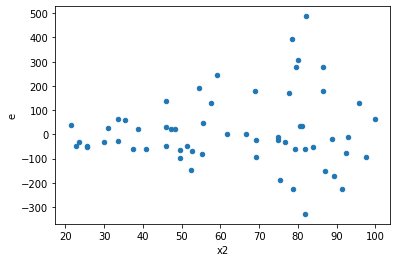

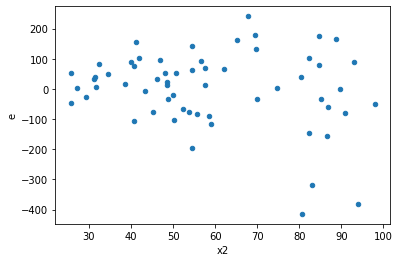

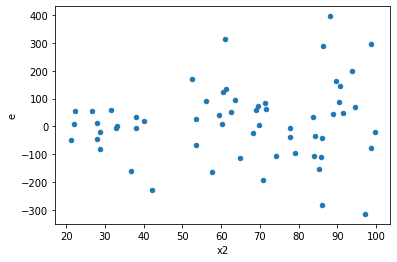

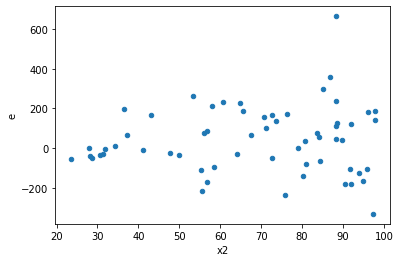

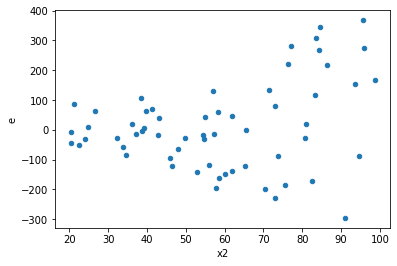

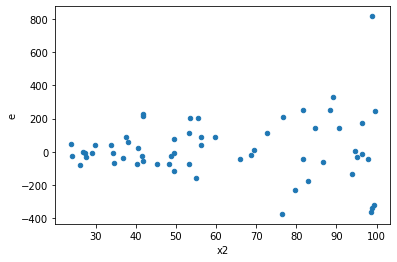

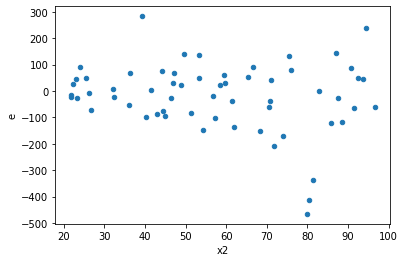

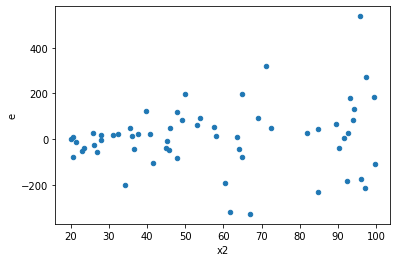

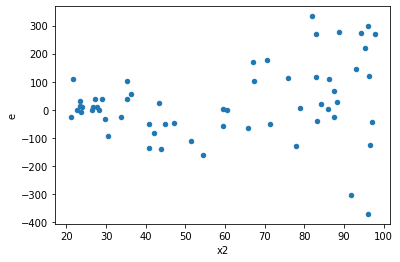

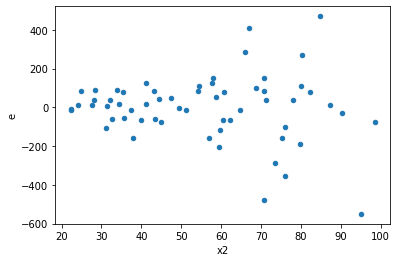

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,862768.9668897499,110861.29397093733,43138.44834448749,5543.064698546867,7.782418335437504,1.5787408658374247e-05,0.9999921062956708,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,624840.5211647742,80048.27859156366,31242.02605823871,4002.4139295781833,7.805795854186258,1.5397423374530206e-05,0.9999923012883127,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,568688.7621162928,117779.2966100053,28434.438105814643,5888.964830500265,4.828427223498828,0.000662155176642365,0.9996689224116788,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,937544.2899418283,297485.6296039214,46877.214497091416,14874.281480196069,3.15156161052248,0.011297622188040979,0.9943511889059795,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,769752.115054326,78124.95942841028,38487.6057527163,3906.2479714205137,9.852832189432208,2.1022070448850627e-06,0.9999989488964776,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,1584260.2550097725,144616.19214896552,79213.01275048862,7230.809607448276,10.95492995264227,8.245204945467322e-07,0.9999995877397527,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,644754.0665283789,133044.96013543027,32237.703326418945,6652.248006771513,4.846136718535338,0.0006447774433027131,0.9996776112783486,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,825723.260204738,72003.6021265845,41286.1630102369,3600.180106329225,11.467804884998554,5.47744318346588e-07,0.9999997261278408,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,757333.6796070115,59243.19556870269,37866.68398035057,2962.1597784351347,12.783471119966048,2.0508872644597886e-07,0.9999998974556368,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,862768.9668897499,110861.29397093733,43138.44834448749,5543.064698546867,7.782418335437504,1.5787408658374247e-05,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,624840.5211647742,80048.27859156366,31242.02605823871,4002.4139295781833,7.805795854186258,1.5397423374530206e-05,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,568688.7621162928,117779.2966100053,28434.438105814643,5888.964830500265,4.828427223498828,0.000662155176642365,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,937544.2899418283,297485.6296039214,46877.214497091416,14874.281480196069,3.15156161052248,0.011297622188040979,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,769752.115054326,78124.95942841028,38487.6057527163,3906.2479714205137,9.852832189432208,2.1022070448850627e-06,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,1584260.2550097725,144616.19214896552,79213.01275048862,7230.809607448276,10.95492995264227,8.245204945467322e-07,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,644754.0665283789,133044.96013543027,32237.703326418945,6652.248006771513,4.846136718535338,0.0006447774433027131,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,825723.260204738,72003.6021265845,41286.1630102369,3600.180106329225,11.467804884998554,5.47744318346588e-07,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,757333.6796070115,59243.19556870269,37866.68398035057,2962.1597784351347,12.783471119966048,2.0508872644597886e-07,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    926
Reject001=1 : Homoscedasticity       74
Name: Result_test, dtype: int64